In [1]:
import h2o
import pandas as pd
import numpy as np
%matplotlib inline
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
df = pd.read_csv("TOTALNSA.csv", index_col="DATE", parse_dates=True)
df.index.freq="MS"
df

,TOTALNSA
DATE,
2010-01-01,712.469
2010-02-01,793.362
2010-03-01,1083.953
2010-04-01,997.334
2010-05-01,1117.570
...,...
2019-08-01,1685.339
2019-09-01,1315.678
2019-10-01,1380.174


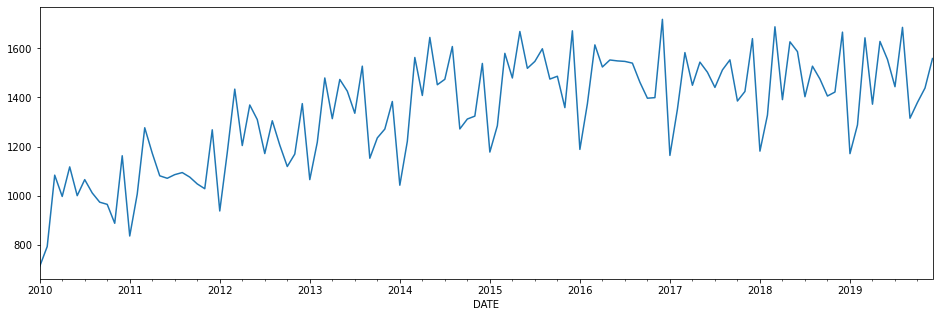

In [5]:
titile="US vehicle sales"
ylabel="Monthly sales"
xlabel=""
ax=df['TOTALNSA'].plot(figsize=(16,5))


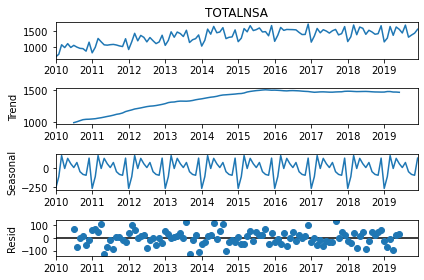

In [6]:
result_sd = seasonal_decompose(df.TOTALNSA)
result_sd.plot();

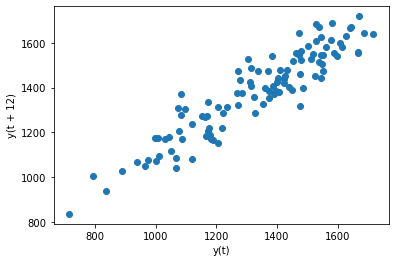

In [7]:
from pandas.plotting import lag_plot
lag_plot(df.TOTALNSA, lag=12)

In [8]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,22 mins 44 secs
H2O_cluster_timezone:,Europe/Belgrade
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.4
H2O_cluster_version_age:,8 days
H2O_cluster_name:,H2O_from_python_babar_dsc5i8
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,952 Mb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


In [12]:
df1=df.copy()

In [13]:
df1['lag12'] = df1.TOTALNSA.shift(12)

In [17]:
df1.dropna(inplace=True)
df1.head()

,TOTALNSA,lag12
DATE,,
2011-01-01,836.366,712.469
2011-02-01,1007.082,793.362
2011-03-01,1276.843,1083.953
2011-04-01,1173.520,997.334
2011-05-01,1081.272,1117.570


In [18]:
trend=np.arange(1, len(df1)+1)

In [19]:
trend2=np.square(trend)

In [20]:
df1['trend']=trend
df1['trend2']=trend2

In [22]:
df1

,TOTALNSA,lag12,trend,trend2
DATE,,,,
2011-01-01,836.366,712.469,1,1
2011-02-01,1007.082,793.362,2,4
2011-03-01,1276.843,1083.953,3,9
2011-04-01,1173.520,997.334,4,16
2011-05-01,1081.272,1117.570,5,25
...,...,...,...,...
2019-08-01,1685.339,1527.416,104,10816
2019-09-01,1315.678,1474.997,105,11025
2019-10-01,1380.174,1405.908,106,11236


In [23]:
train=h2o.H2OFrame(df1.iloc[:96])

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [25]:
test=h2o.H2OFrame(df1.iloc[96:])

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [26]:
x=['lag12', 'trend', 'trend2']
y='TOTALNSA'


In [27]:
from h2o.estimators import H2ORandomForestEstimator

In [28]:
model=H2ORandomForestEstimator(ntrees=100, max_depth=20, nfolds=5)

In [29]:
model.train(x=x, y=y, training_frame=train)

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [30]:
performance=model.model_performance(test_data=test)
print(performance)


ModelMetricsRegression: drf
** Reported on test data. **

MSE: 12792.943880056146
RMSE: 113.1058967519207
MAE: 92.22353047688797
RMSLE: 0.08019739215655722
Mean Residual Deviance: 12792.943880056146



In [31]:
predict = model.predict(test)
predict

drf prediction progress: |████████████████████████████████████████████████| 100%


predict
1320.1
1457.35
1631.79
1479.17
1623.5
1614.57
1481.1
1557.87
1547.1
1482.33


AttributeError: 'numpy.ndarray' object has no attribute 'plot'

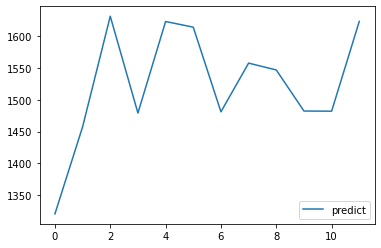

In [41]:
predict.as_data_frame().plot()
df1.TOTALNSA.iloc[96:].values.plot()